In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('outer_space_objects.csv')
df = df[df['Entity']!='World']
df = df[df['Code'].isin(['RUS', 'USA'])]
df.sort_values('Year', inplace=True)
df.head(30)

,Entity,Code,Year,num_objects
766,Russia,RUS,1957,2
767,Russia,RUS,1958,1
1026,United States,USA,1958,7
768,Russia,RUS,1959,3
1027,United States,USA,1959,11
769,Russia,RUS,1960,3
1028,United States,USA,1960,17
1029,United States,USA,1961,31
770,Russia,RUS,1961,7
1030,United States,USA,1962,55


In [54]:
# Create a pivot table to reshape the data for stacked area chart
pivot_df = df.pivot(index='Year', columns='Code', values='num_objects')
pivot_df.dropna(inplace=True)

pivot_df_100 = pivot_df.divide(pivot_df.sum(axis=1), axis=0)

In [57]:
pivot_df.columns

Index(['RUS', 'USA'], dtype='object', name='Code')

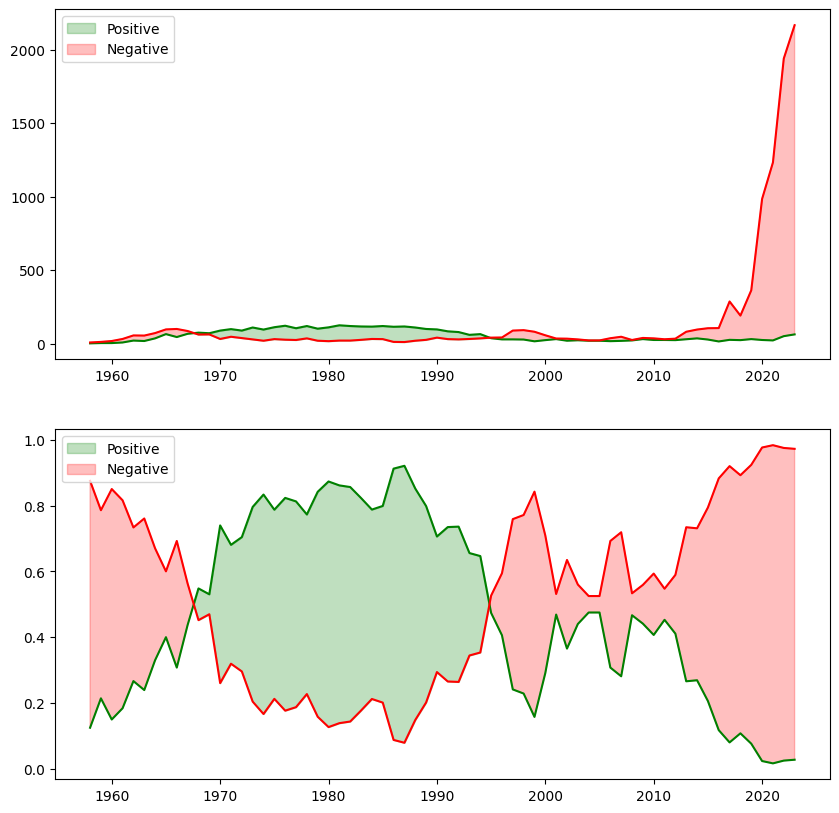

In [62]:
pivot_df

# Initialize figure and axis
fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

# Plot lines
axs[0].plot(pivot_df.index, pivot_df['RUS'], color="green")
axs[0].plot(pivot_df.index, pivot_df['USA'], color="red")
axs[0].fill_between(
    pivot_df.index, pivot_df['RUS'], pivot_df['USA'], where=(pivot_df['RUS'] > pivot_df['USA']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)
axs[0].fill_between(
    pivot_df.index, pivot_df['RUS'], pivot_df['USA'], where=(pivot_df['RUS'] <= pivot_df['USA']), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)
axs[0].legend()

# Plot lines
axs[1].plot(pivot_df_100.index, pivot_df_100['RUS'], color="green")
axs[1].plot(pivot_df_100.index, pivot_df_100['USA'], color="red")
axs[1].fill_between(
    pivot_df_100.index, pivot_df_100['RUS'], pivot_df_100['USA'], where=(pivot_df_100['RUS'] > pivot_df_100['USA']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)
axs[1].fill_between(
    pivot_df_100.index, pivot_df_100['RUS'], pivot_df_100['USA'], where=(pivot_df_100['RUS'] <= pivot_df_100['USA']), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)
axs[1].legend(loc='upper left')

plt.show()

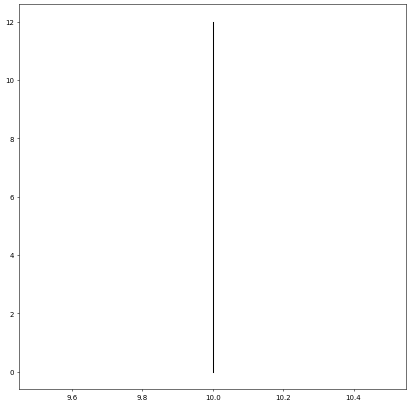

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot((10, 10), (0, 12), color='black')

plt.show()

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text

# animation
from PIL import Image, ImageSequence
import textwrap
import math
from matplotlib.animation import FuncAnimation

df = pd.read_csv('outer_space_objects.csv')
df = df[df['Entity']!='World']
df = df[df['Code'].isin(['RUS', 'USA'])]
df.sort_values('Year', inplace=True)

# pivot data
pivot_df = df.pivot(index='Year', columns='Code', values='num_objects')
pivot_df.dropna(inplace=True)
pivot_df_reference = pivot_df.copy()

# interpolate for more data points
multiple = 5
new_index = np.linspace(pivot_df.index.min(), pivot_df.index.max(), len(pivot_df) * multiple-(multiple-1))
pivot_df = pivot_df.reindex(new_index).interpolate(method='linear')
pivot_df.reset_index(inplace=True)
pivot_df.rename(columns={'index': 'Year'}, inplace=True)
pivot_df['Year'] = pivot_df['Year'].astype(int)
pivot_df.index = pivot_df['Year']
pivot_df.drop(columns='Year', inplace=True)
pivot_df.index = new_index

# higher interpolate level after 2018
pivot_df_before = pivot_df.loc[:2018]
pivot_df_after = pivot_df.loc[2018:]
multiple_end = 15
new_index_end = np.linspace(pivot_df_after.index.min(), pivot_df_after.index.max(), len(pivot_df_after) * multiple_end-(multiple_end-1))
pivot_df_after = pivot_df_after.reindex(new_index_end).interpolate(method='linear')
pivot_df_after.reset_index(inplace=True)
pivot_df_after.rename(columns={'index': 'Year'}, inplace=True)
pivot_df_after['Year'] = pivot_df_after['Year'].astype(int)
pivot_df_after.index = pivot_df_after['Year']
pivot_df_after.drop(columns='Year', inplace=True)
pivot_df_after.index = new_index_end

# combine data
pivot_df = pd.concat([pivot_df_before, pivot_df_after])
pivot_df.drop_duplicates(inplace=True)
pivot_df.tail()

Code,RUS,USA
2022.946667,61.36,2153.893333
2022.960000,61.52,2156.920000
2022.973333,61.68,2159.946667
2022.986667,61.84,2162.973333
2023.000000,62.00,2166.000000


Original animation finished
Final animation finished!
Time of the GIF: 46.25 seconds


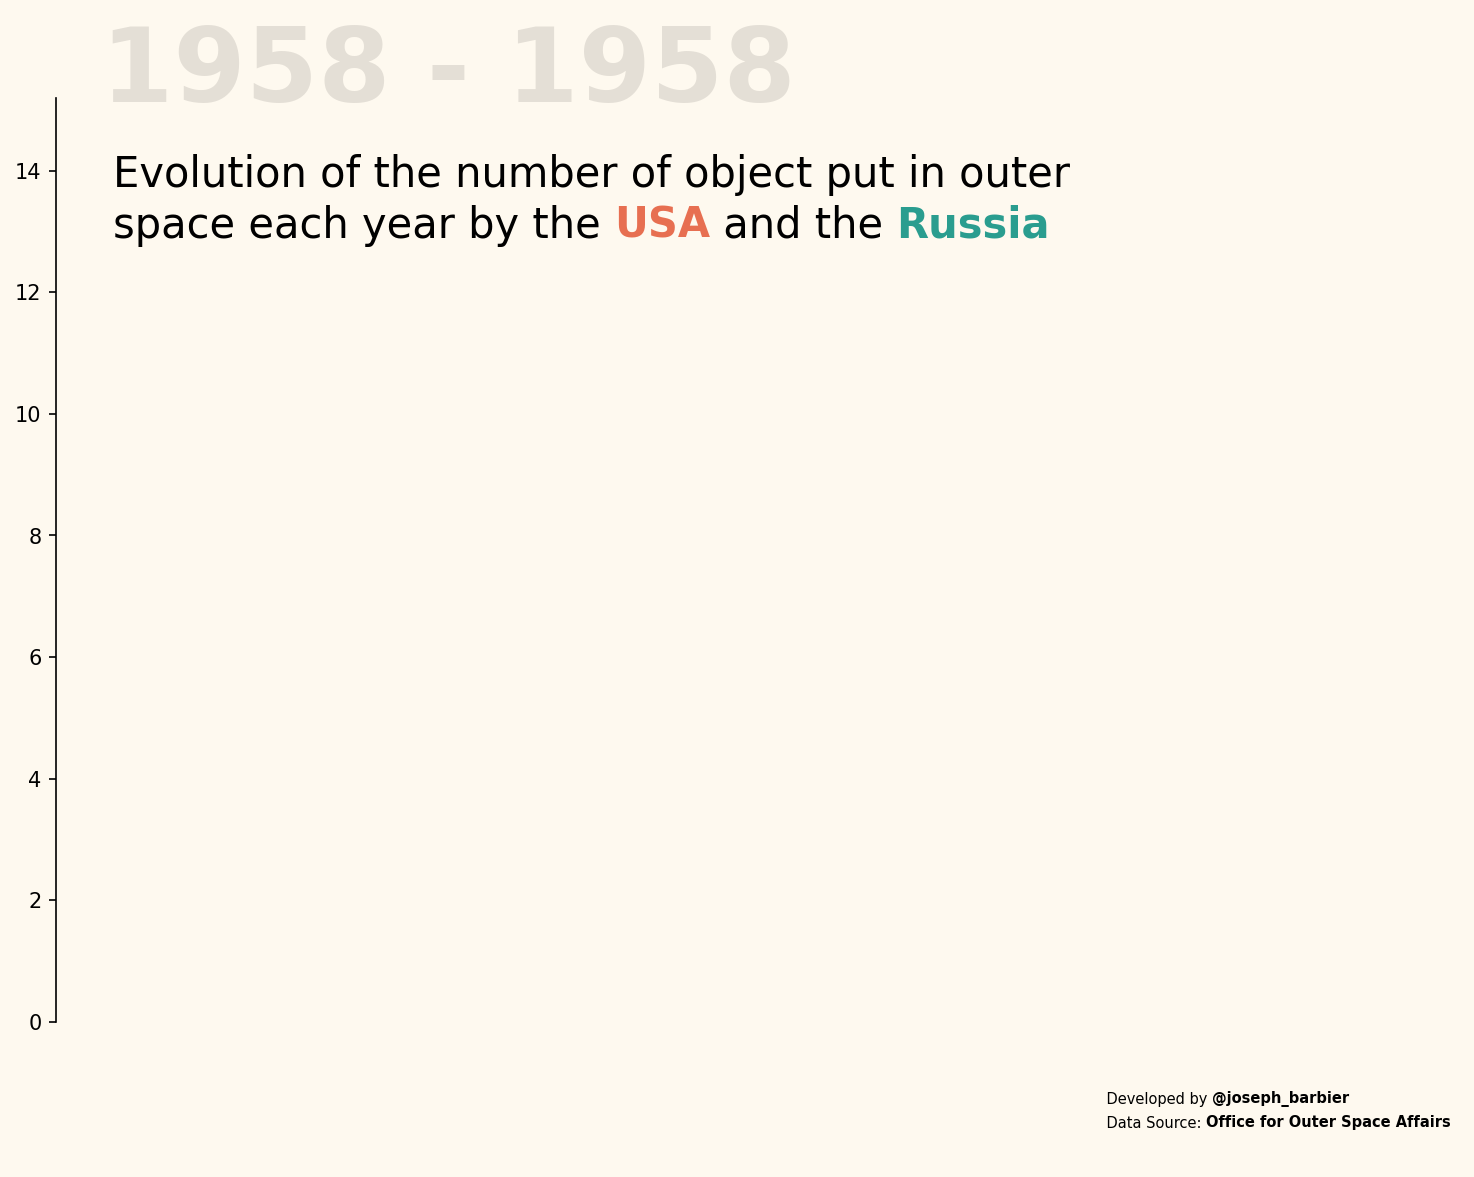

In [364]:
# parameters
delay_years = 1
initial_duration = 50
highlight_duration = initial_duration
colors = ['#2a9d8f', '#e76f51']
background_color = '#fef9ef'

# reference values
total = pivot_df_reference.sum().sum()
us_share = pivot_df_reference.loc[:,'USA'].sum()/total*100
rus_share = 100 - us_share
data_after_2012 = pivot_df_reference.loc[pivot_df_reference.index >= 2012]
us_share_after_2012 = data_after_2012['USA'].sum()/data_after_2012.sum().sum()*100

# increase resolution
dpi = 150
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi

# Figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# dates to highlight
start_date = 1958
end_date = 2023
first_human_spaceflight = 1961
us_moon_landing = 1969
hubble_launch = 1990
internat_space_station = 1998
earth_size_found = 2017
photo_black_hole = 2019
total_objects_today = 2023
dates_highlight = [
    first_human_spaceflight + delay_years,
    us_moon_landing + delay_years,
    hubble_launch + delay_years,
    internat_space_station + delay_years,
    earth_size_found + delay_years,
    photo_black_hole + delay_years,
]
event_end_dates = dates_highlight[1:] + [end_date + delay_years]
adjustements = [
    (0, 0),
    (0, 10),
    (2, 5),
    (0, 20),
    (-18, 0),
    (-22, -400),
]
event_texts = [
    f'First Human Spaceflight\n<{first_human_spaceflight}>',
    f'US Moon Landing\n<{us_moon_landing}>',
    f'Hubble Launch\n<{hubble_launch}>',
    f'International Space Station\n<{internat_space_station}>',
    f'Earth Size Planets found\n<{earth_size_found}>',
    f'First Image of a Black Hole\n<{photo_black_hole}>'
]

# description
description = f"""Between {start_date} and {end_date}, the USA and Russia have launched in outer space a total of {int(total)} objects. The USA has launched {us_share:.2f}% of these objects, while the Russia has only launched {rus_share:.2f}% of them.\n

After 2012, {us_share_after_2012:.2f}% of the objects launched in outer space by the USA and Russia were from the USA, highlighting the increasing dominance of the USA in outer space exploration.
"""

def annot_event(current_date, event_start_date, event_end_date, adj, text):
    if event_start_date <= current_date <= event_end_date:
        sub_subset = pivot_df.loc[event_start_date]
        total_objects_thisyear = sub_subset['RUS'] + sub_subset['USA']

        ax.plot((event_start_date, event_start_date), (0, total_objects_thisyear), color='black', zorder=10)
        ax.scatter(event_start_date, total_objects_thisyear, color='black', s=100, zorder=10)
        ax_text(
            event_start_date - 2 + adj[0], total_objects_thisyear*1.2 + adj[1],
            text,
            fontsize=14,
            color='black',
            ha='left', va='center',
            highlight_textprops=[
                {'fontweight':'bold'}
            ],
            ax=ax
        )
        

def update(frame):
    ax.clear()
    subset_df = pivot_df.iloc[:frame]
    ax.stackplot(
        subset_df.index, subset_df.values.T,
        colors=colors
    )
    
    # test if last 5 frames
    factor_y_axis = 1.9
    y_max = pivot_df.iloc[:frame+1].sum(axis=1).max()*factor_y_axis
    ax.set_ylim(0, y_max)
    ax.set_xticks([])
    ax.spines[['top', 'right', 'bottom']].set_visible(False)

    # year annotation in background
    year = pivot_df.index[frame]
    fig_text(
        0.15, 0.9,
        '1958 - ' + str(round(year)),
        ha='left', va='center',
        fontsize=50,
        fontweight='bold',
        alpha=0.1,
        fig=fig
    )

    # description of video
    text = """
    Evolution of the number of object put in outer
    space each year by the <USA> and the <Russia>
    """
    fig_text(
        0.127, 0.84,
        text,
        ha='left', va='top',
        fontsize=20,
        color='black',
        highlight_textprops=[
                {'color':colors[1],
                'fontweight':'bold'},
                {'color':colors[0],
                'fontweight':'bold'}
        ],
        fig=fig
    )

    total_chars = len(description)
    effective_frame_count = len(pivot_df) - 20
    num_chars = math.ceil(total_chars * (frame / effective_frame_count)) if frame < effective_frame_count else total_chars
    current_description = description[:num_chars]
    wrapped_text = '\n'.join([textwrap.fill(paragraph, width=70) for paragraph in current_description.split('\n')])
    
    fig_text(
        0.157, 0.72,
        wrapped_text,
        ha='left', va='top',
        fontsize=14,
        color='black',
        fig=fig
    )

    last_frame = len(pivot_df) - 1
    if frame == last_frame:
        total_last = int(pivot_df.loc[total_objects_today].sum())
        total_usa = int(pivot_df.loc[total_objects_today, "USA"])
        total_rus = int(pivot_df.loc[total_objects_today, "RUS"])
        text = f"""
        Total Objects Launched in Outer Space in {total_objects_today}: <{total_last}>
        <USA>: <{total_usa}> ({total_usa/total_last*100:.2f}%)
        <Russia>: <{total_rus}> ({total_rus/total_last*100:.2f}%)
        """
        fig_text(
            0.43, 0.32,
            text,
            ha='center', va='center',
            fontsize=16,
            color='black',
            highlight_textprops=[
                {'fontweight': 'bold'},
                {'color': colors[1], 'fontweight': 'bold'},
                {'fontweight': 'bold'},
                {'color': colors[0], 'fontweight': 'bold'},
                {'fontweight': 'bold'},
            ],
            fig=fig
        )
    else:
        for event_date, end_date, adj, event_text in zip(dates_highlight, event_end_dates, adjustements, event_texts):
            annot_event(year, event_date, end_date, adj, event_text)

    # credit annotation
    text = """
    Developed by <@joseph_barbier>
    Data Source: <Office for Outer Space Affairs>
    """
    fig_text(
        0.9, 0,
        text,
        ha='right', va='bottom',
        fontsize=7,
        color='black',
        highlight_textprops=[
            {'fontweight':'bold'},
            {'fontweight':'bold'},
        ],
        fig=fig
    )

    return ax

# Creating the animation
ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=5 # in ms
)
ani.save('animation.gif', writer='imagemagick', fps=20)
print('Original animation finished')


# get initial frames
with Image.open('animation.gif') as img:
    frames = [frame.copy() for frame in ImageSequence.Iterator(img)]

# set duration of each frame
for i, frame in enumerate(frames):
    frame_duration = initial_duration

    # highlight dates
    if pivot_df.index[i] in dates_highlight:
        frame_duration = highlight_duration

    # make last 12 frames becomes step by step slower
    if i > len(frames) - 12:
        frame_duration = initial_duration + (i - len(frames) + 12) * 50

    # stay for last date
    if i == len(frames) - 1:
        frame_duration = 10000
    frame.info['duration'] = frame_duration

# Save the modified frames as a new GIF
frames[0].save('modified_animation.gif', save_all=True, append_images=frames[1:], loop=0)
print('Final animation finished!')

def time_of_gif(gif_path):
    with Image.open(gif_path) as img:
        duration = 0
        for frame in ImageSequence.Iterator(img):
            duration += frame.info['duration']
    print(f'Time of the GIF: {duration/1000} seconds')
time_of_gif('modified_animation.gif')